In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
print(np.__version__)

1.19.5


In [21]:
# Kaggle Dataset - https://www.kaggle.com/code/francksylla/titanic-machine-learning-from-disaster/
titanic_df = pd.read_csv('datasets/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#S - Southhampton
#C - Cherbourh
#Q - Queenstown
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
titanic_df.shape

(891, 12)

In [24]:
#Drop passangerId, Name, Ticket, Cabin columns
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],'columns',inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [26]:
titanic_df = titanic_df.dropna()

In [27]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [28]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


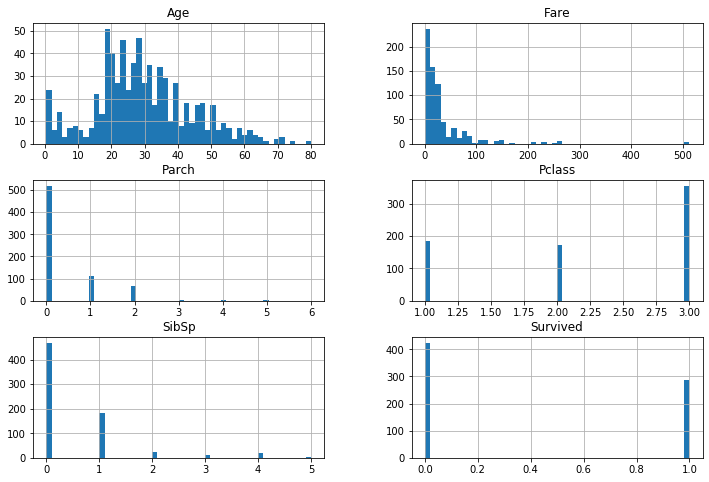

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
titanic_df.hist(bins=50,figsize=(12,8))
plt.show()

In [30]:
pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [31]:
pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [32]:
titanic_data_corr = titanic_df.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


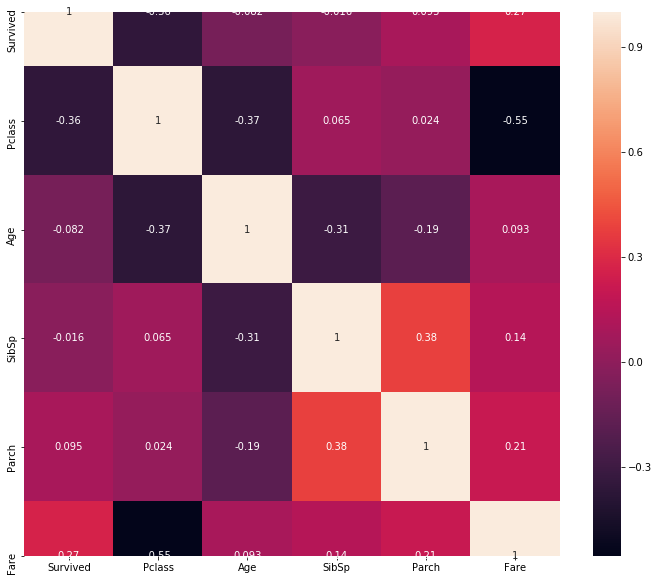

In [33]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(titanic_data_corr,annot=True)

In [34]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [35]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [36]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [37]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,1,31.0,0,0,10.5000,0,0,1
1,0,2,1,66.0,0,0,10.5000,0,0,1
2,0,3,1,35.0,0,0,8.0500,0,0,1
3,1,2,0,17.0,0,0,10.5000,0,0,1
4,0,3,1,48.0,0,0,7.8542,0,0,1


In [38]:
titanic_df.to_csv('datasets/titanic_procesed.csv',index=False)


In [39]:
!ls datasets

fashion-mnist_train.csv      titanic_processed.csv
titanic_procesed.csv         titanic_train.csv
titanic_processed-author.csv


In [40]:
titanic_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,0.182584,0.039326,0.778090
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.386597,0.194506,0.415823
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [41]:
titanic_df.shape

(712, 10)

In [76]:
from sklearn.model_selection import train_test_split
X = titanic_df.drop('Survived',axis=1)
Y = titanic_df['Survived']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

In [77]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
497,1,0,41.0,0,0,134.50,1,0,0
118,3,1,18.0,0,0,8.05,0,0,1
151,1,1,52.0,1,1,79.65,0,0,1
232,2,1,47.0,0,0,15.00,0,0,1
42,1,1,80.0,0,0,30.00,0,0,1


In [78]:
x_train.shape,y_train.shape

((569, 9), (569,))

In [79]:
x_test.shape,y_test.shape

((143, 9), (143,))

In [80]:
from sklearn.linear_model import LogisticRegression
# Train the Model - x_train, y_train data and We used l2 (we can use l1 or l2), C value small means Strong
#liblinear works well for small datasets
logistic_model = LogisticRegression(penalty='l2',C=1.0,solver='liblinear').fit(x_train,y_train)

In [81]:
y_pred = logistic_model.predict(x_test)


In [82]:
pred_results = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})

In [83]:
pred_results.head()

,y_test,y_pred
700,0,0
557,0,0
153,0,0
344,0,1
287,0,0


In [84]:
# Setup confustion Matrix to calculate Prcision and Recall - F1 can calculate
titanic_crosstab = pd.crosstab(pred_results.y_pred,pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,70,24
1,11,38


In [85]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Classification problem results can mesure using accuracy (), precision, recall , 
#F1 score(single value from precision and recall)

In [86]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

In [87]:
print(f'accuracy_score : {acc}',acc)
print(f'precision_score : {prec}',prec)
print(f'recall_score : {recall}',recall)

accuracy_score : 0.7552447552447552 0.7552447552447552
precision_score : 0.7755102040816326 0.7755102040816326
recall_score : 0.6129032258064516 0.6129032258064516


In [89]:
TP = titanic_crosstab[1][1]
TN = titanic_crosstab[0][0]
FP = titanic_crosstab[0][1]
FN = titanic_crosstab[1][0]

In [91]:
accuracy_score_verified = (TP+TN) /(TP+FP+TN+FN)
accuracy_score_verified

0.7552447552447552

In [92]:
precision_score_survived = TP/ (TP + FP)
precision_score_survived

0.7755102040816326

In [93]:
recall_score_survived = TP / (TP + FN)
recall_score_survived

0.6129032258064516